<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Skew-T---ln-P-plot" data-toc-modified-id="Skew-T---ln-P-plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Skew-T - ln P plot</a></span><ul class="toc-item"><li><span><a href="#setting-labels-and-ticks" data-toc-modified-id="setting-labels-and-ticks-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>setting labels and ticks</a></span></li><li><span><a href="#Skewed-temperature-coordinates" data-toc-modified-id="Skewed-temperature-coordinates-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Skewed temperature coordinates</a></span></li><li><span><a href="#Determining-the-skew" data-toc-modified-id="Determining-the-skew-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Determining the skew</a></span></li></ul></li><li><span><a href="#Add-a-datapoint-to-the-skewT-diagram" data-toc-modified-id="Add-a-datapoint-to-the-skewT-diagram-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Add a datapoint to the skewT diagram</a></span></li><li><span><a href="#change-the-axes" data-toc-modified-id="change-the-axes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>change the axes</a></span></li></ul></div>

# Skew-T - ln P plot

Demonstrate how to construct dry adiabats and isotherms for
a thermodynamic diagram using the functions in
[skewlib.py](https://github.com/phaustin/atsc405_2018/blob/master/a405/skewT/skewlib.py)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## setting labels and ticks

The next box shows how to set up a plot of a 5 degree isotherm in
unskewed coordinates.   Not that I invert the yaxis so pressure increases
downwards, and I make y a log scale and draw a horizontal grid.

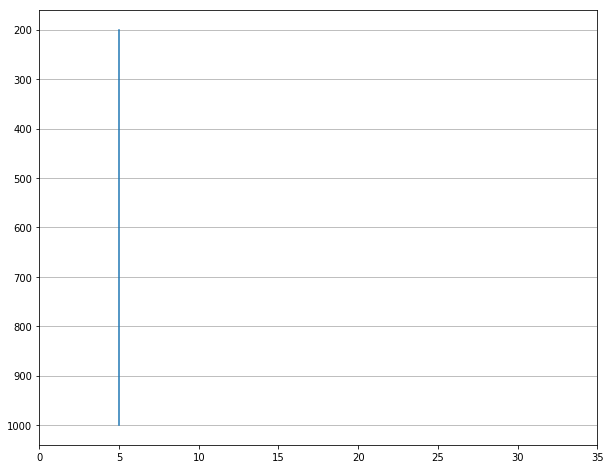

In [2]:
import matplotlib.ticker as ticker
press=np.linspace(200,1000,30)
temps=np.ones_like(press)*5
fig,ax = plt.subplots(1,1,figsize=(10,8))
#ax.yaxis.set_major_locator(ticker.NullLocator())
ax.plot(temps,press)
ax.set(xlim=[0,35])
ax.invert_yaxis()
#ax.set_yscale('log')
# ax.set_ylim((1000, 200))
# locs = np.array(range(200, 1100, 100))
# labels = [str(item) for item in locs]
# ax.yaxis.set_ticklabels([])

# ax.yaxis.set_ticks(locs);
# ax.yaxis.set_ticklabels(labels); # hand label the pressures
#
# make all the axes labels bold
#
# plt.setp(ax.get_xticklabels(), weight='bold')
# plt.setp(ax.get_yticklabels(), weight='bold');
ax.yaxis.grid(True)
#ax.set_ylabel('log(Pressure (hPa))',weight='bold');
#out=fig.clf();

## Skewed temperature coordinates

If you try plotting your soundings on the conventional plot above, you'll see
that the height-temperature dependence makes it difficult to see the temperature
and dewpoint together.  The traditional approach is to slant the temperature
line by a constant slope (note that this is different from rotating the line,
because the y axis doesn't change)

In [3]:
#listing for a405.skewT.skewlib.convertSkewToTemp
def convertSkewToTemp(xcoord, press, skew):
    """
    convertSkewToTemp(xcoord, press, skew)

    Determines temperature from knowledge of a plotting coordinate
    system and corresponding plot skew.
    
    Parameters
    - - - - - -
    xcoord : int
        X coordinate in temperature plotting coordinates.
    press : float
        Pressure (hPa).
    skew : int
        Skew of a given coordinate system.

    Returns
    - - - -
    Temp : float
        Converted temperature in degC.

    Examples
    - - - - -
    >>> convertSkewToTemp(300, 8.e4, 30)
    638.6934574096806
    
    """
    Temp = xcoord  + skew * np.log(press);
    return Temp

#listing for a405.skewT.skewlib.convertTempToSkew
def convertTempToSkew(Temp, press, skew):
    """
    convertTempToSkew(Temp, press, skew)

    Determines the transformed temperature in plotting coordinates.
    
    Parameters
    - - - - - -
    Temp : float
        Temperature (degC)
    press : float
        Pressure (hPa).
    skew : int
        Designated skew factor of temperature.

    Returns
    - - - -
    tempOut : float
        Converted temperature (degC).

    Examples
    - - - - -
    >>> convertTempToSkew(30., 8.e4, 30)
    -308.69345740968055
    
    """
    
    tempOut = Temp - skew * np.log(press);
    return tempOut


## Determining the skew

Getting a isotherm with a 45 degree slope in these coordinates is tricky, because it depends on
the shape of the plot and the exact range values chosen for the temperature and pressure axis.
Calculating the slope that will give a 45 degree angle isn't particularly hard (try it), but
it's easier to just try some different skew values, and then save the result so you can put
your data up in the same coordinates.  For square plots with typical sounding ranges setting
skew = 30 Kelvin  is about right.  Below I show what 4 different values of the skew look like.

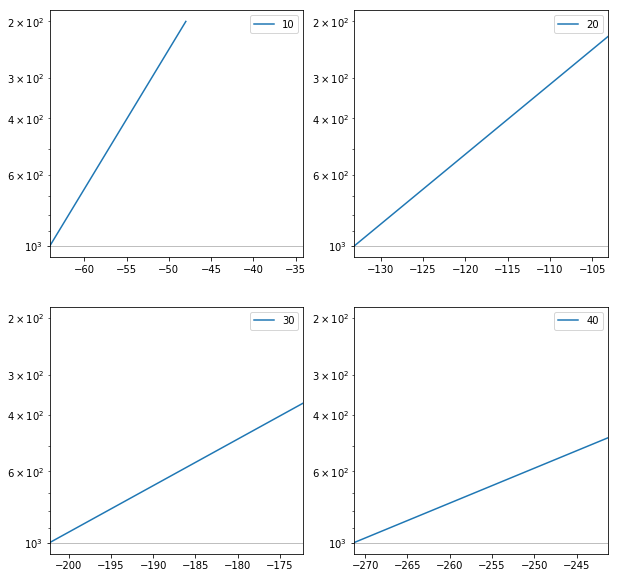

In [4]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
axes=axes.ravel()  #axes comes back as a 2x2 array, flatten it
press=np.linspace(200,1000,30)
the_temp=5.
linelist=[]
skew_vals=[10,20,30, 40]
for ax,skew in zip(axes,skew_vals):
    xcoord=convertTempToSkew(the_temp,press,skew)
    ax.plot(xcoord,press,label=skew)
    ax.invert_yaxis()
    ax.set_yscale('log')
    locs = np.array(range(100, 1100, 100))
    labels = locs
#     ax.set_yticks(locs)
#     ax.set_yticklabels(labels) # Conventionally labels semilog graph.
#     ax.set_ybound((400, 1000))
#     plt.setp(ax.get_xticklabels(), weight='bold')
#     plt.setp(ax.get_yticklabels(), weight='bold')
    ax.yaxis.grid(True)
    out=ax.legend()
    TempTickLabels = range(-15, 40, 5)
    TempTickCoords = TempTickLabels
    skewTickCoords = convertTempToSkew(TempTickCoords, 1.e3, skew)
    #ax.set_xticks(skewTickCoords)
    #out=ax.set_xticklabels(TempTickLabels)
    skewLimits = convertTempToSkew([5, 35], 1.e3, skew)
    out=ax.set(xlim=skewLimits)

In [5]:
from a405.skewT.skewlib import makeSkewDry

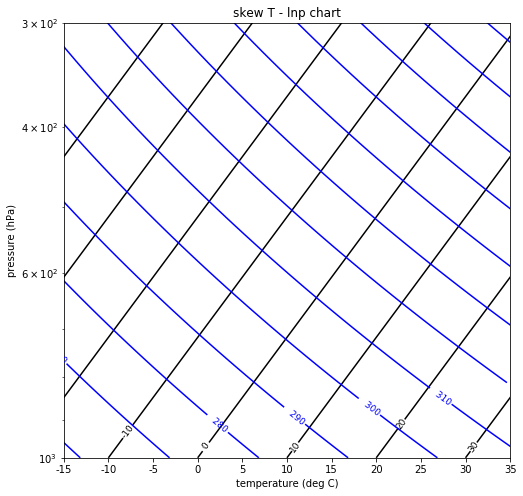

In [6]:
fig,ax =plt.subplots(1,1,figsize=(8,8))
ax,skew = makeSkewDry(ax)

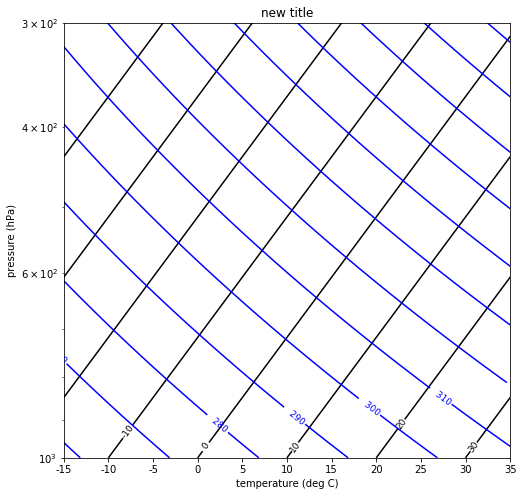

In [7]:
ax.set(title='new title')
display(fig)

# Add a datapoint to the skewT diagram

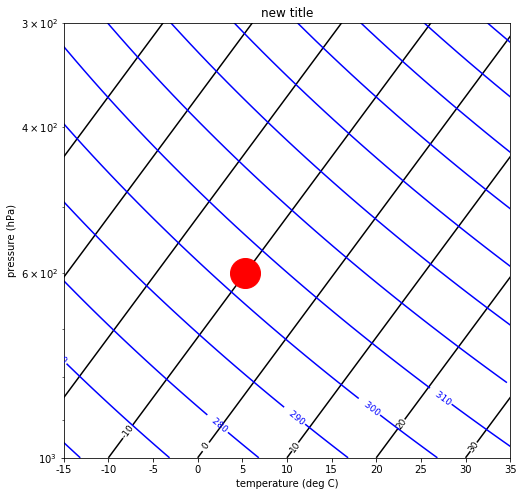

In [8]:
temp=-10
press=600
skewtemp=convertTempToSkew(temp,press,skew)
ax.plot(skewtemp,press,'ro',markersize=30)
display(fig)

# change the axes

Here's how to change the xaxis so that the left corner at 1000 hPa goes down to -35 deg C
and the upper boundary stops at 600 hPa

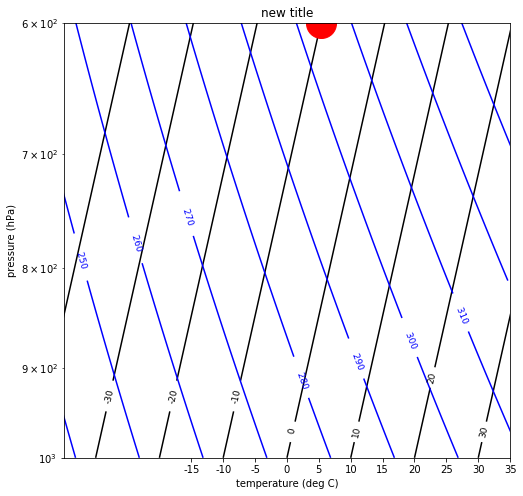

In [17]:
skewLimits = convertTempToSkew([-35, 35], 1.e3, skew)
out=ax.set(xlim=skewLimits,ylim=(1000.,600.))
display(fig)